In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px 
from scipy import stats

In [1]:
import nltk 
import spacy
import re
import PyPDF2

In [3]:
nlp=spacy.load('en_core_web_lg')

In [26]:
doc=nlp(u'The quick brown fox jumped over the lazy dogs')
len(doc.vector)
tokens=nlp('lion cat pet')
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text , token1.similarity(token2))

lion lion 1.0
lion cat 0.3854507803916931
lion pet 0.20031584799289703
cat lion 0.3854507803916931
cat cat 1.0
cat pet 0.732966423034668
pet lion 0.20031584799289703
pet cat 0.732966423034668
pet pet 1.0


In [34]:
nlp('car').similarity(nlp('skoda'))

0.4260278558557243

In [4]:
print(200*'_')

________________________________________________________________________________________________________________________________________________________________________________________________________


In [51]:
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

In [52]:
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)
sentences

'We are about to study the idea of a computational process Computational processes are abstract beings that inhabit computers As they evolve processes manipulate other abstract things called data The evolution of a process is directed by a pattern of rules called a program People create programs to direct processes In effect we conjure the spirits of the computer with our spells '

In [53]:
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()
sentences

'We are about to study the idea of computational process Computational processes are abstract beings that inhabit computers As they evolve processes manipulate other abstract things called data The evolution of process is directed by pattern of rules called program People create programs to direct processes In effect we conjure the spirits of the computer with our spells'

In [54]:
sentences=sentences.lower()

In [55]:
from nltk.tokenize import word_tokenize 
words=word_tokenize(sentences)
words

['we',
 'are',
 'about',
 'to',
 'study',
 'the',
 'idea',
 'of',
 'computational',
 'process',
 'computational',
 'processes',
 'are',
 'abstract',
 'beings',
 'that',
 'inhabit',
 'computers',
 'as',
 'they',
 'evolve',
 'processes',
 'manipulate',
 'other',
 'abstract',
 'things',
 'called',
 'data',
 'the',
 'evolution',
 'of',
 'process',
 'is',
 'directed',
 'by',
 'pattern',
 'of',
 'rules',
 'called',
 'program',
 'people',
 'create',
 'programs',
 'to',
 'direct',
 'processes',
 'in',
 'effect',
 'we',
 'conjure',
 'the',
 'spirits',
 'of',
 'the',
 'computer',
 'with',
 'our',
 'spells']

In [56]:
vocab=set(words)
words

['we',
 'are',
 'about',
 'to',
 'study',
 'the',
 'idea',
 'of',
 'computational',
 'process',
 'computational',
 'processes',
 'are',
 'abstract',
 'beings',
 'that',
 'inhabit',
 'computers',
 'as',
 'they',
 'evolve',
 'processes',
 'manipulate',
 'other',
 'abstract',
 'things',
 'called',
 'data',
 'the',
 'evolution',
 'of',
 'process',
 'is',
 'directed',
 'by',
 'pattern',
 'of',
 'rules',
 'called',
 'program',
 'people',
 'create',
 'programs',
 'to',
 'direct',
 'processes',
 'in',
 'effect',
 'we',
 'conjure',
 'the',
 'spirits',
 'of',
 'the',
 'computer',
 'with',
 'our',
 'spells']

In [57]:
vocab_size=len(vocab)
embad_dim=10
context_size=3

In [58]:
word_to_ix={word:i for i ,word in enumerate(vocab)}
word_to_ix

{'they': 0,
 'evolve': 1,
 'about': 2,
 'inhabit': 3,
 'computational': 4,
 'of': 5,
 'create': 6,
 'direct': 7,
 'by': 8,
 'the': 9,
 'process': 10,
 'effect': 11,
 'is': 12,
 'abstract': 13,
 'manipulate': 14,
 'we': 15,
 'spirits': 16,
 'in': 17,
 'spells': 18,
 'with': 19,
 'our': 20,
 'beings': 21,
 'people': 22,
 'program': 23,
 'data': 24,
 'as': 25,
 'that': 26,
 'idea': 27,
 'other': 28,
 'evolution': 29,
 'to': 30,
 'directed': 31,
 'rules': 32,
 'things': 33,
 'processes': 34,
 'programs': 35,
 'are': 36,
 'conjure': 37,
 'study': 38,
 'pattern': 39,
 'computer': 40,
 'computers': 41,
 'called': 42}

In [85]:
ix_to_word={i:word for i,word in enumerate(vocab)}
ix_to_word

{0: 'they',
 1: 'evolve',
 2: 'about',
 3: 'inhabit',
 4: 'computational',
 5: 'of',
 6: 'create',
 7: 'direct',
 8: 'by',
 9: 'the',
 10: 'process',
 11: 'effect',
 12: 'is',
 13: 'abstract',
 14: 'manipulate',
 15: 'we',
 16: 'spirits',
 17: 'in',
 18: 'spells',
 19: 'with',
 20: 'our',
 21: 'beings',
 22: 'people',
 23: 'program',
 24: 'data',
 25: 'as',
 26: 'that',
 27: 'idea',
 28: 'other',
 29: 'evolution',
 30: 'to',
 31: 'directed',
 32: 'rules',
 33: 'things',
 34: 'processes',
 35: 'programs',
 36: 'are',
 37: 'conjure',
 38: 'study',
 39: 'pattern',
 40: 'computer',
 41: 'computers',
 42: 'called'}

In [60]:
 """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

'We are about to study the idea of a computational process.\nComputational processes are abstract beings that inhabit computers.\nAs they evolve, processes manipulate other abstract things called data.\nThe evolution of a process is directed by a pattern of rules\ncalled a program. People create programs to direct processes. In effect,\nwe conjure the spirits of the computer with our spells.'

In [61]:
vocab_size=len(vocab)
embad_dim=10
context_size=2

In [62]:
data=[]
for i in range(context_size,len(words)-context_size):
    context=[words[i-context_size],words[i-1],words[i+1],words[i+context_size]]
    target=words[i]
    data.append((context,target))
print(data[:5])

[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]


In [75]:
embeddings =  np.random.random_sample((vocab_size, embad_dim))
print(embeddings.shape)
embeddings


(43, 10)


array([[0.58540866, 0.8508296 , 0.12172078, 0.21652757, 0.65362304,
        0.33802296, 0.61789957, 0.8316153 , 0.57606163, 0.75608691],
       [0.75665863, 0.60293675, 0.6187916 , 0.94846307, 0.94770778,
        0.26742087, 0.79572826, 0.59545285, 0.34633985, 0.52490355],
       [0.05469767, 0.96632671, 0.47993564, 0.87962833, 0.8959219 ,
        0.52947044, 0.29171144, 0.56510572, 0.80952007, 0.11929729],
       [0.66926843, 0.41984069, 0.2325018 , 0.01940454, 0.53353079,
        0.15300859, 0.79930443, 0.18497893, 0.23723324, 0.51091582],
       [0.29646909, 0.39381492, 0.91118523, 0.60889438, 0.88529913,
        0.91462143, 0.33129799, 0.83098895, 0.90826171, 0.64114357],
       [0.52508648, 0.14463599, 0.34693699, 0.41064647, 0.90900129,
        0.89775754, 0.11740969, 0.66244752, 0.02344018, 0.92993409],
       [0.531833  , 0.08880022, 0.19312345, 0.78183317, 0.48896747,
        0.53134942, 0.03378305, 0.8108566 , 0.98351715, 0.08115525],
       [0.82486342, 0.49029454, 0.2377347

## linear model

In [64]:
def linear(m, theta):
    w = theta
    return m.dot(w)

### Log softmax + Nlloss = Cross Entropy

In [81]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

In [66]:
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [67]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- out + softmax) / logits.shape[0]

### forward fun

In [82]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    return m, n, o


### back fun

In [77]:
def backward(preds, theta, target_idxs):
    m, n, o = preds
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    return dw

### optimize fun

In [78]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

### training fun

In [79]:
theta = np.random.uniform(-1, 1, (2 * context_size * embad_dim, vocab_size))


In [83]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
        
     
    epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

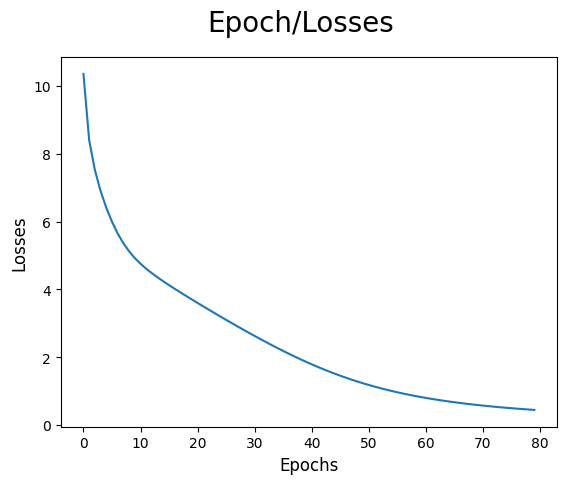

In [84]:
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [86]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    
    return word

In [89]:
predict(['we', 'are', 'to', 'study'])


'about'

In [90]:

def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1
            
    return (1 - (wrong / len(data)))

In [91]:
accuracy()


1.0